In [1]:
# Import necessary library
import pandas as pd


# load the data
data = pd.read_csv("Bloom_cleaned_data.csv")

Saving Bloom_cleaned_data.csv to Bloom_cleaned_data.csv


In [31]:
def time_based_split(data):
    """
    Split the data based on the 'Year' column for each company.
    For each company, all years except the last one will be used for training.
    The last year will be used for validation/testing.
    """
    train_data = pd.DataFrame()
    valid_data = pd.DataFrame()

    # Unique companies in the dataset
    companies = data['Name'].unique()

    for company in companies:
        company_data = data[data['Name'] == company]

        if len(company_data) == 1:
            train_data = pd.concat([train_data, company_data])
        else:
            # All years except the last one will be used for training
            train_data = pd.concat([train_data, company_data[:-1]])
            valid_data = pd.concat([valid_data, company_data[-1:]])

    return train_data, valid_data

# Apply the time_based_split function on the dataframe
train_data, valid_data = time_based_split(data)

train_data.shape, valid_data.shape


((5250, 15), (1785, 15))

In [32]:
# Features to consider
features = [
    'ENVIRON_DISCLOSURE_SCORE',
    'SOCIAL_DISCLOSURE_SCORE',
    'GOVNCE_DISCLOSURE_SCORE',
    'ESG_DISCLOSURE_SCORE',

]

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to create the model
def create_model(units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Grid search parameters
units_options = [50, 100]
dropout_options = [0.1, 0.2, 0.3]
batch_size_options = [16, 32]
epochs_options = [50, 100]

best_score = np.inf
best_params = {}

for units in units_options:
    for dropout_rate in dropout_options:
        for batch_size in batch_size_options:
            for epochs in epochs_options:
                # Create model
                model = create_model(units, dropout_rate)

                # Split training data for validation
                X_train_part, X_val, y_train_part, y_val = train_test_split(X_train_reshaped, y_train_reshaped, test_size=0.2, random_state=42)

                # Train the model
                model.fit(X_train_part, y_train_part, epochs=epochs, batch_size=batch_size, verbose=0)

                # Predict on validation set
                val_predictions = model.predict(X_val)
                val_mse = mean_squared_error(y_val, val_predictions)

                # Check if this is the best score
                if val_mse < best_score:
                    best_score = val_mse
                    best_params = {'units': units, 'dropout_rate': dropout_rate, 'batch_size': batch_size, 'epochs': epochs}

print("Best Score (MSE):", best_score)
print("Best Parameters:", best_params)


33/33 [==============================] - 0s 2ms/step
Best Score (MSE): 0.002319970217279814
Best Parameters: {'units': 50, 'dropout_rate': 0.3, 'batch_size': 16, 'epochs': 50}


In [33]:
# Importing necessary libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# 1. Data Preparation

# Extract features and target from training data
X_train = train_data[features].values
y_train = train_data['EBITDA'].values

# Scale features and target data
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler_X.fit_transform(X_train)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Convert to supervised learning problem
def create_dataset(X, y, look_back=1):
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        dataX.append(X[i:(i + look_back), :])
        dataY.append(y[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
X_train_reshaped, y_train_reshaped = create_dataset(X_train_scaled, y_train_scaled, look_back)

# 2. Model Building & Training

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train_reshaped, y_train_reshaped, epochs=50, batch_size=16, verbose=2, validation_split=0.2)

# Print the final training loss
print("Final training loss:", history.history['loss'][-1])


Epoch 1/50
263/263 - 6s - loss: 0.0053 - val_loss: 0.0041 - 6s/epoch - 25ms/step
Epoch 2/50
263/263 - 1s - loss: 0.0048 - val_loss: 0.0041 - 954ms/epoch - 4ms/step
Epoch 3/50
263/263 - 1s - loss: 0.0047 - val_loss: 0.0041 - 945ms/epoch - 4ms/step
Epoch 4/50
263/263 - 1s - loss: 0.0047 - val_loss: 0.0040 - 1s/epoch - 4ms/step
Epoch 5/50
263/263 - 1s - loss: 0.0047 - val_loss: 0.0041 - 957ms/epoch - 4ms/step
Epoch 6/50
263/263 - 1s - loss: 0.0046 - val_loss: 0.0041 - 1s/epoch - 4ms/step
Epoch 7/50
263/263 - 1s - loss: 0.0046 - val_loss: 0.0040 - 929ms/epoch - 4ms/step
Epoch 8/50
263/263 - 1s - loss: 0.0046 - val_loss: 0.0041 - 950ms/epoch - 4ms/step
Epoch 9/50
263/263 - 1s - loss: 0.0046 - val_loss: 0.0040 - 928ms/epoch - 4ms/step
Epoch 10/50
263/263 - 1s - loss: 0.0046 - val_loss: 0.0041 - 1s/epoch - 5ms/step
Epoch 11/50
263/263 - 1s - loss: 0.0046 - val_loss: 0.0040 - 1s/epoch - 5ms/step
Epoch 12/50
263/263 - 1s - loss: 0.0046 - val_loss: 0.0041 - 1s/epoch - 5ms/step
Epoch 13/50
263/26

In [34]:
from math import sqrt

# Calculate MSE and RMSE for the validation dataset
val_mse = history.history['val_loss'][-1]
val_rmse = sqrt(val_mse)

print("Validation MSE: ", val_mse)
print("Validation RMSE: ", val_rmse)


Validation MSE:  0.0040400647558271885
Validation RMSE:  0.06356150372534612


Saving the trained model

In [16]:
pip install h5py


In [36]:
from google.colab import files

# Save the model to HDF5 file
model.save('01LSTM_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
/content/drive/MyDrive/BD-CW

In [37]:
from google.colab import drive
drive.mount('/content/drive')


path_to_model = '/content/drive/MyDrive/ColabNotebooks/01LSTM_model.h5'

# Save the model to the path
model.save(path_to_model)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
from tensorflow.keras.models import load_model

# Load the model from the HDF5 file
loaded_model = load_model('/content/drive/MyDrive/ColabNotebooks/01LSTM_model.h5')

In [39]:
features = [
    'ENVIRON_DISCLOSURE_SCORE',
    'SOCIAL_DISCLOSURE_SCORE',
    'GOVNCE_DISCLOSURE_SCORE',
    'ESG_DISCLOSURE_SCORE',
]

In [40]:
# After loading the model, check the model summary to confirm the expected input shape
model = load_model('/content/drive/MyDrive/ColabNotebooks/01LSTM_model.h5')
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 50)                11000     
                                                                 
 dropout_26 (Dropout)        (None, 50)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 51        
                                                                 
Total params: 11051 (43.17 KB)
Trainable params: 11051 (43.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:


# load the data
test_data = pd.read_csv("Final_SME_ESG_Fame_Filled.csv")

# Extract features and target from the test data
test_features = test_data[features].values
test_target = test_data['EBITDA'].values  # EBITDA is what we want to predict

# Load the trained model
model = load_model('/content/drive/MyDrive/ColabNotebooks/01LSTM_model.h5')


test_features_reshaped = np.expand_dims(test_features, axis=1)

# Make predictions with the model
predictions = model.predict(test_features_reshaped)

predictions_inversed = scaler_y.inverse_transform(predictions)


Saving Final_SME_ESG_Fame_Filled.csv to Final_SME_ESG_Fame_Filled (2).csv
16/16 [==============================] - 0s 2ms/step


In [42]:
test_data.head()

Company name  ESG_DISCLOSURE_SCORE  SOCIAL_DISCLOSURE_SCORE  \
0  ABEL & COLE LIMITED             81.311706                47.950371   
1  ABEL & COLE LIMITED             84.933545                77.149180   
2  ABEL & COLE LIMITED            100.000000                51.954789   
3  ABEL & COLE LIMITED             81.027074                98.035447   
4  ABEL & COLE LIMITED             79.713213                48.184476   

   ENVIRON_DISCLOSURE_SCORE  GOVNCE_DISCLOSURE_SCORE  Year    EBITDA  
0                 16.831398                16.736999  2022  5127.000  
1                  9.742634                13.246250  2010  1972.045  
2                 31.611289                15.153558  2012  3992.130  
3                 20.410873                21.410005  2013   546.000  
4                 12.378499                19.478507  2014  5122.000

In [43]:
print(test_data.columns)

Index(['Company name', 'ESG_DISCLOSURE_SCORE', 'SOCIAL_DISCLOSURE_SCORE',
       'ENVIRON_DISCLOSURE_SCORE', 'GOVNCE_DISCLOSURE_SCORE', 'Year',
       'EBITDA'],
      dtype='object')


Mean Squared Error: 1522326767.999794
Root Mean Squared Error: 39017.00613834683


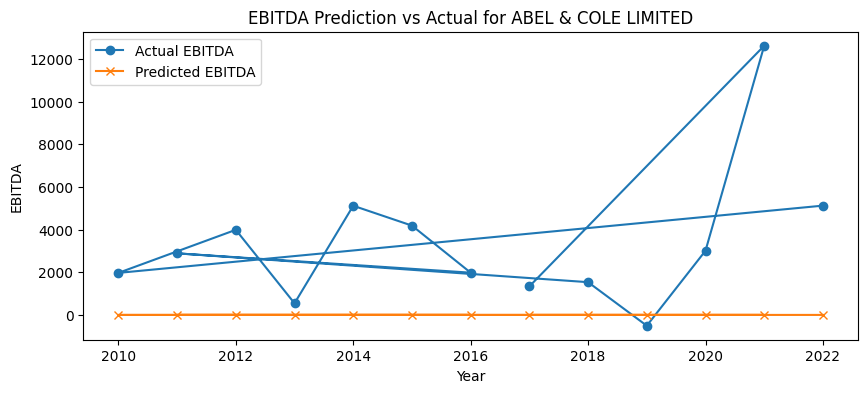

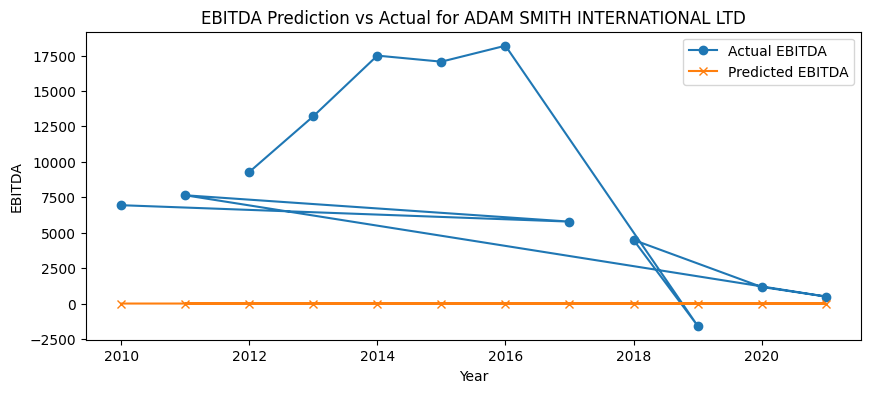

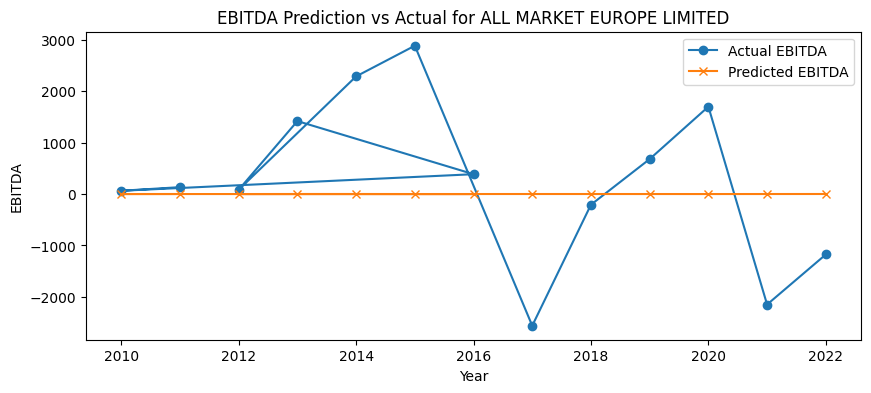

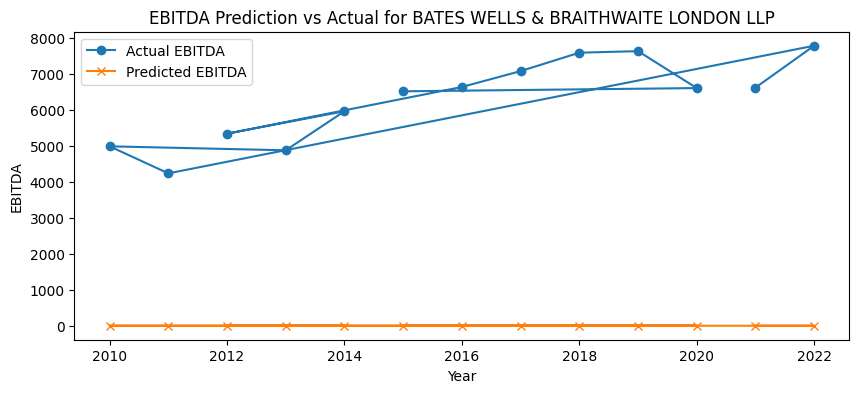

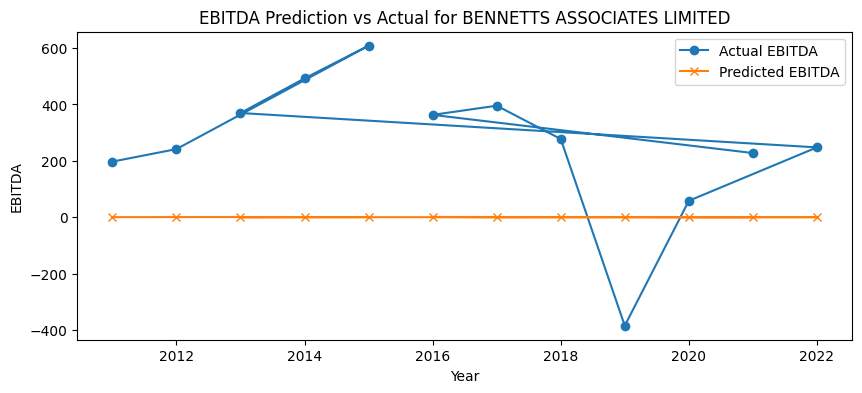

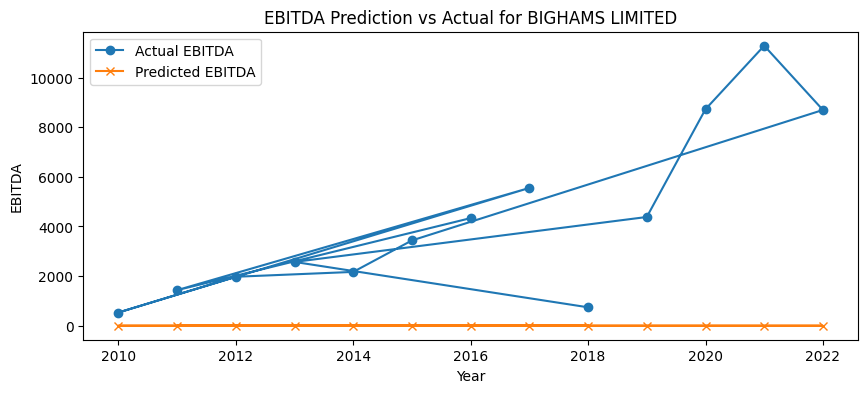

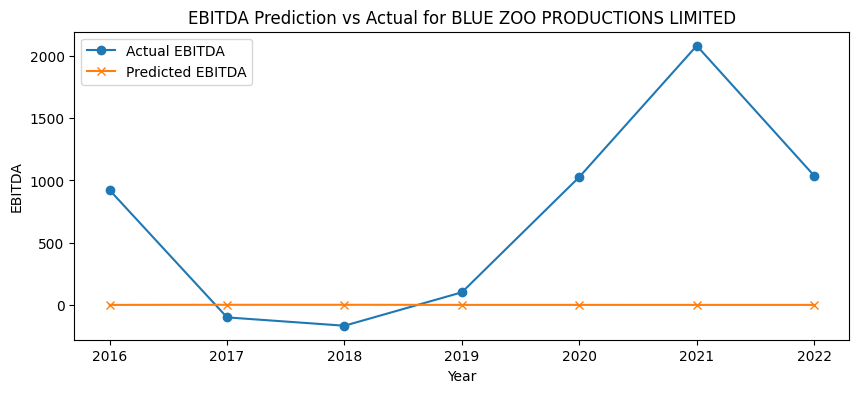

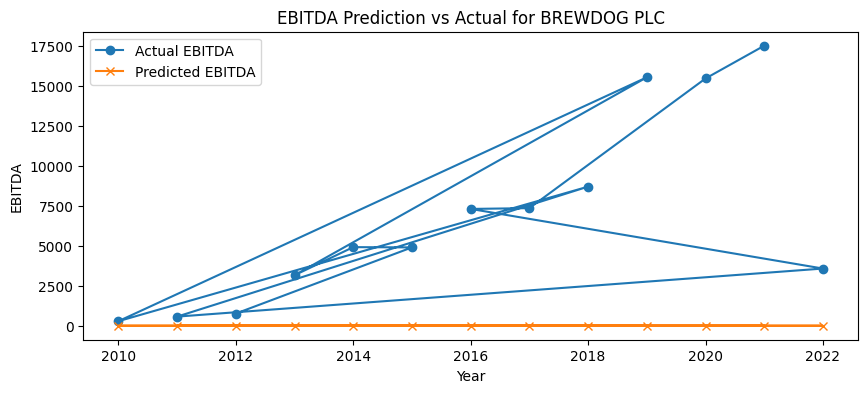

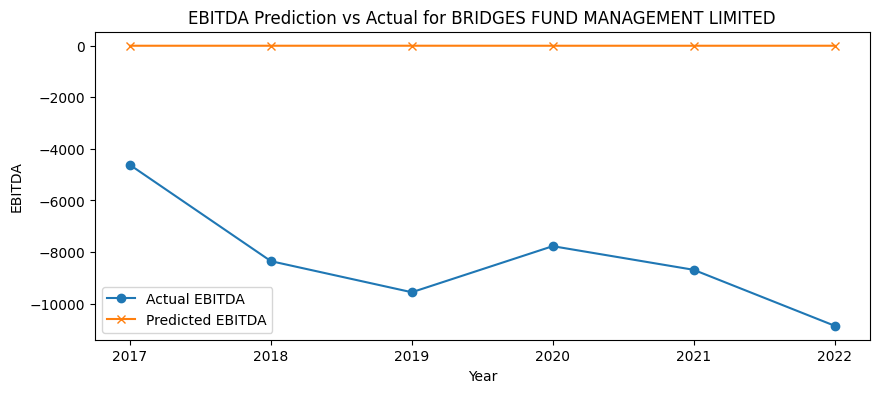

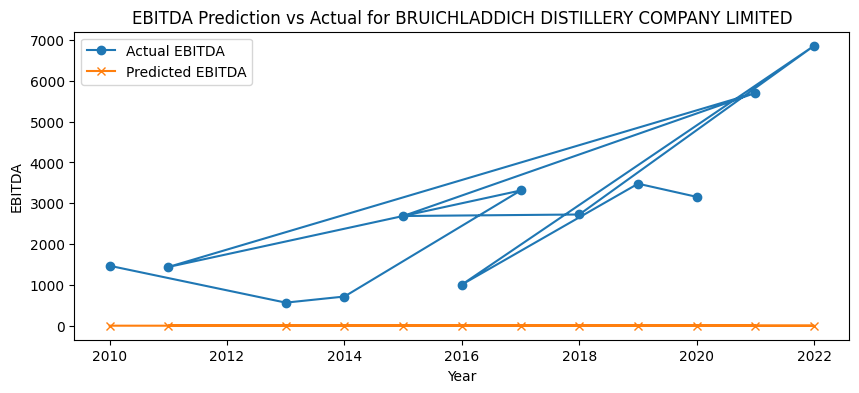

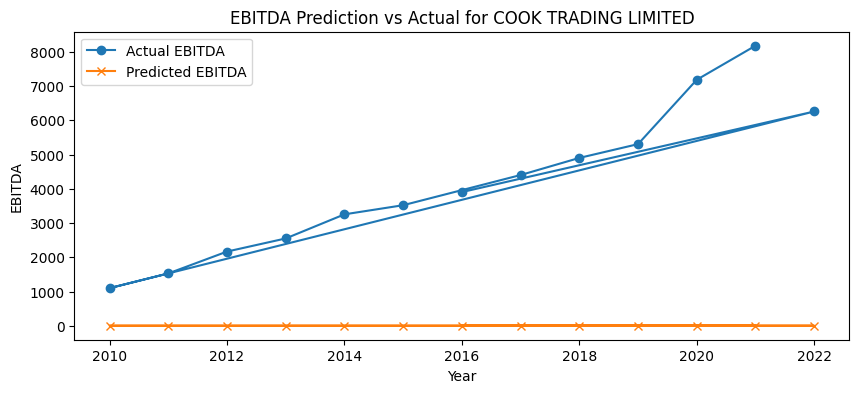

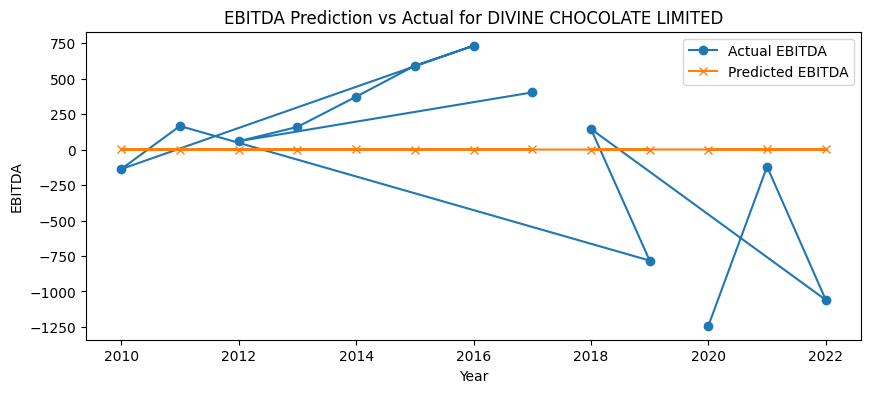

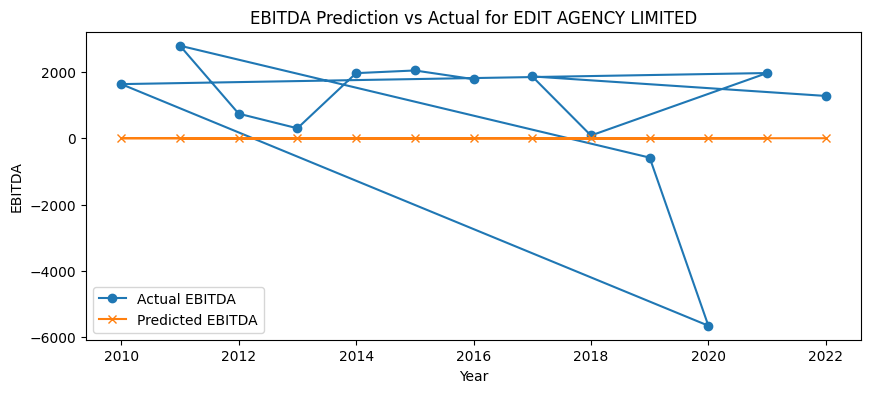

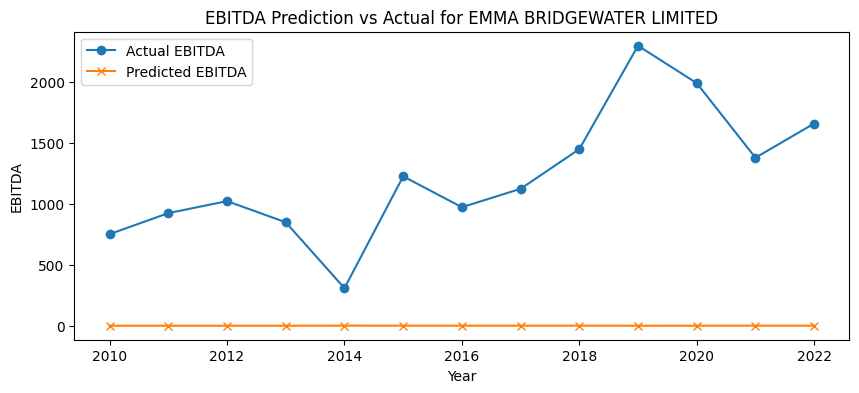

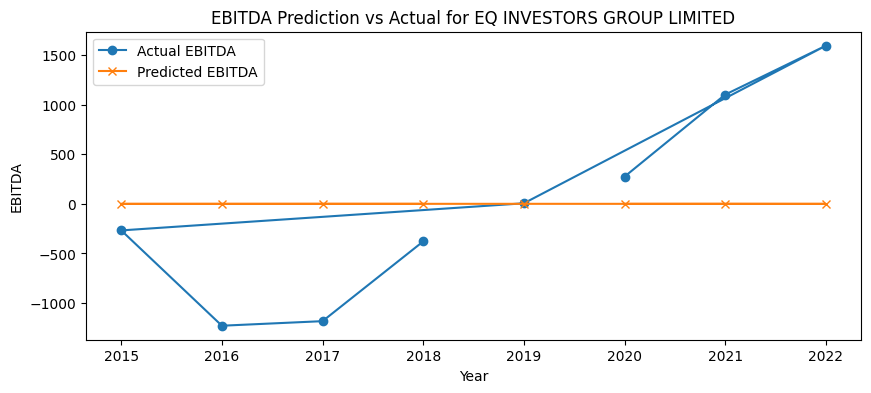

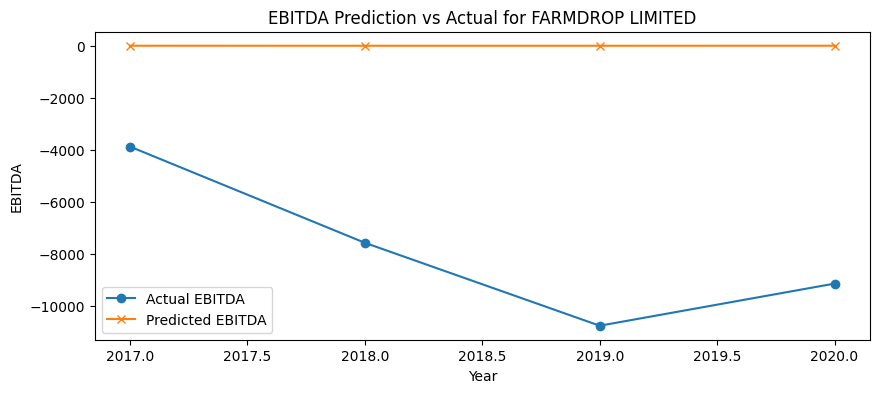

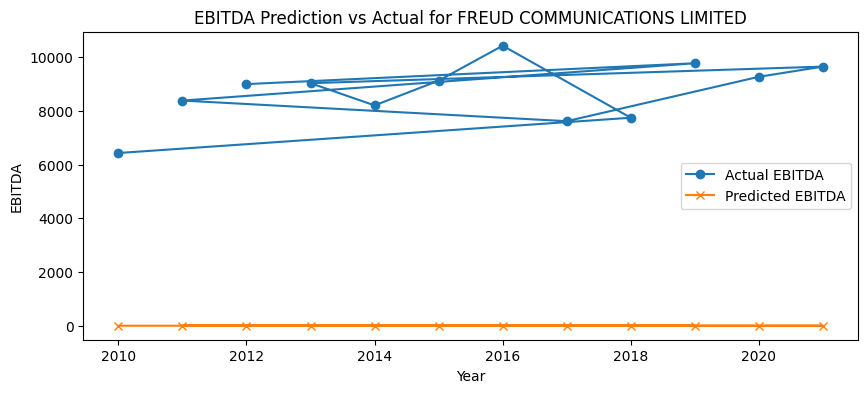

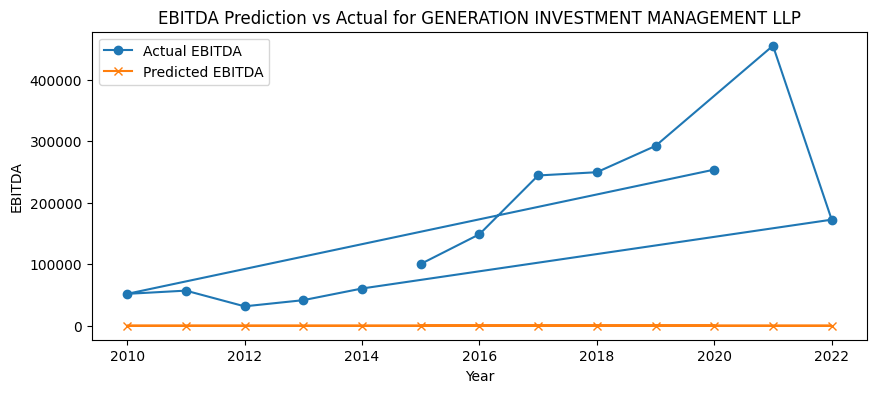

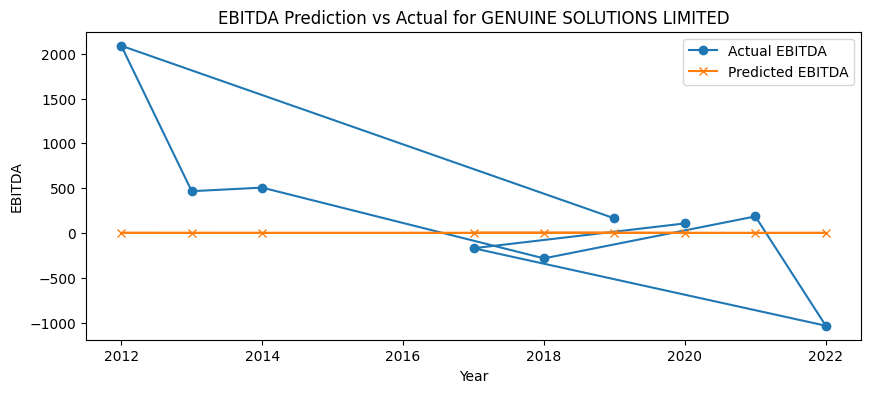

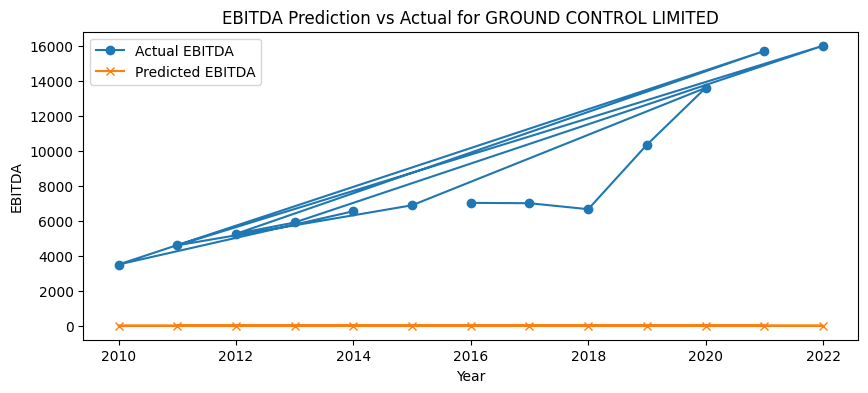

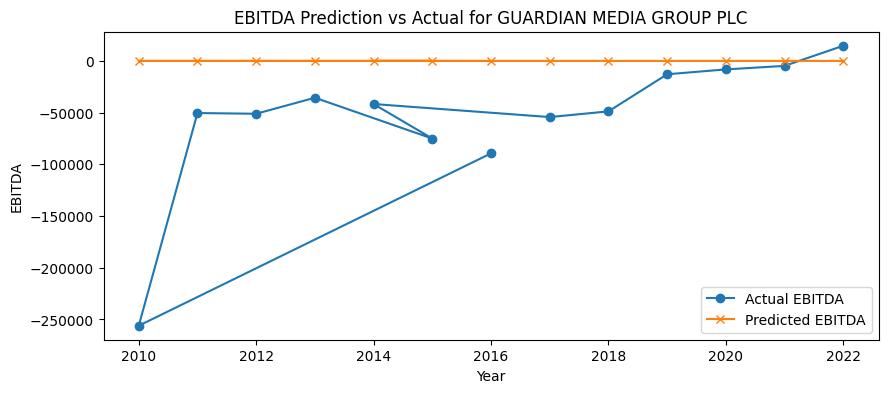

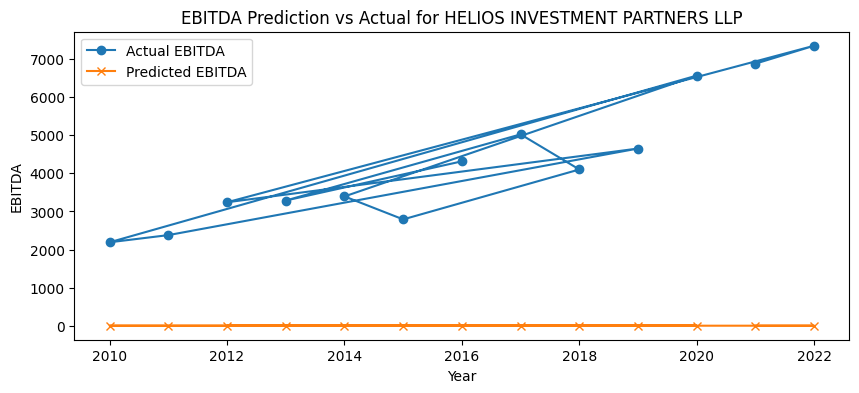

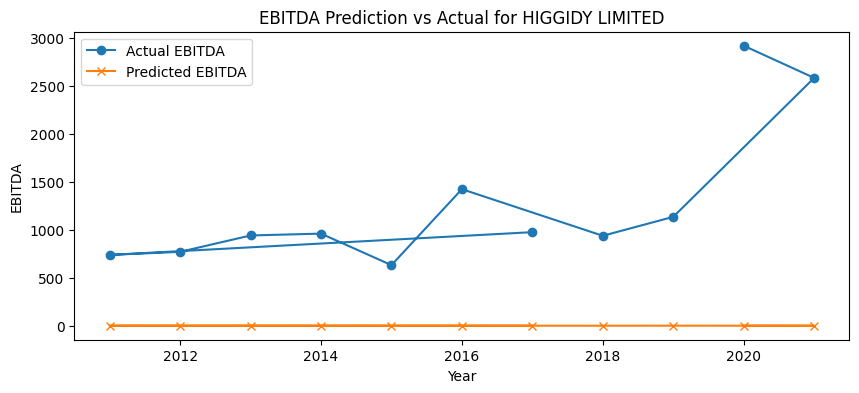

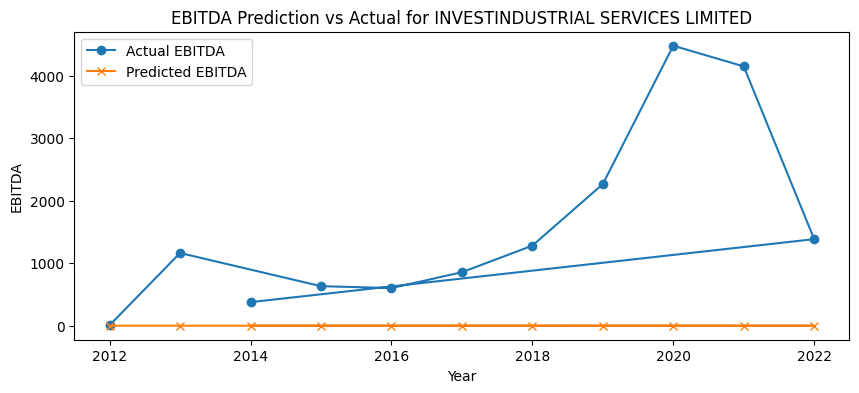

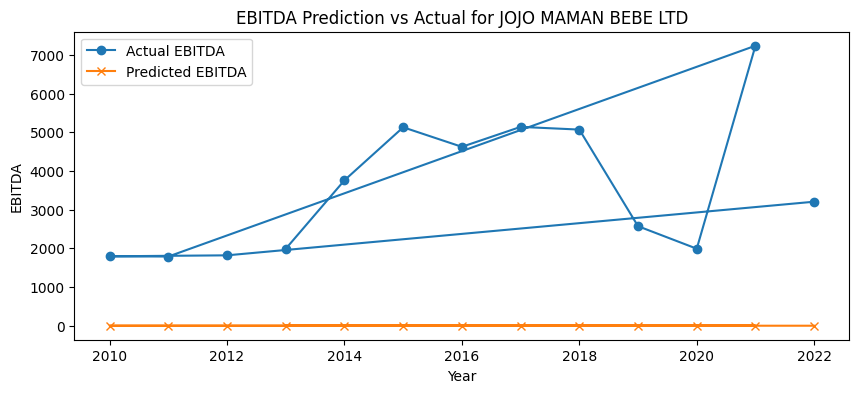

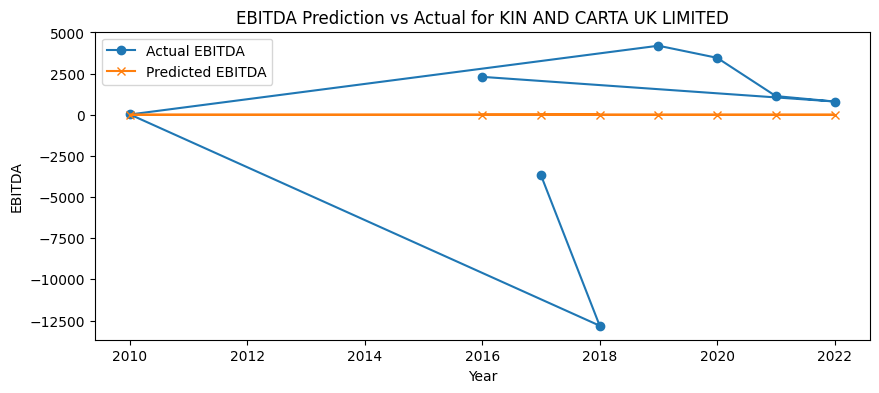

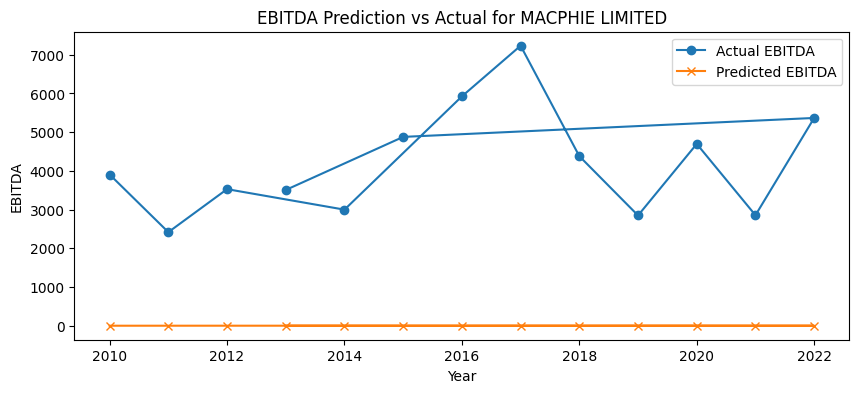

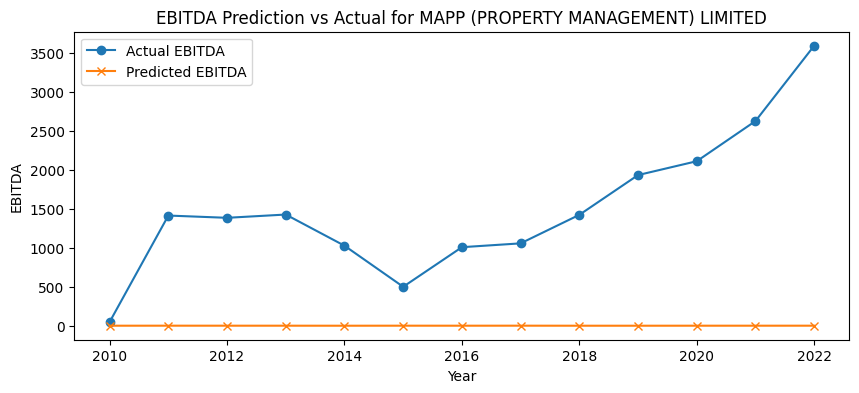

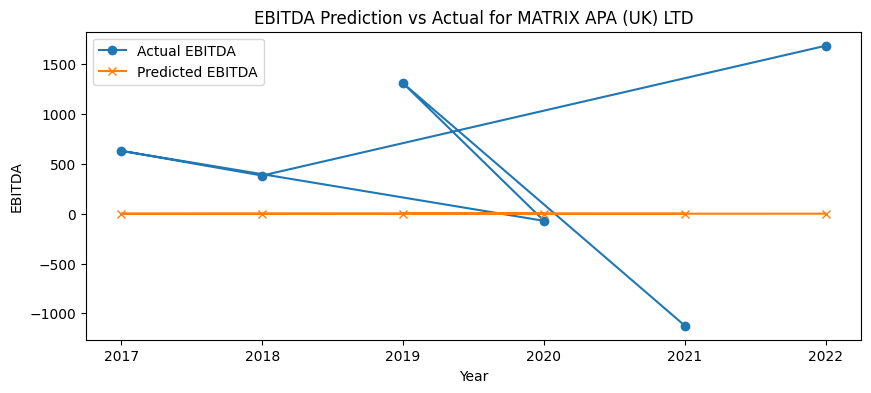

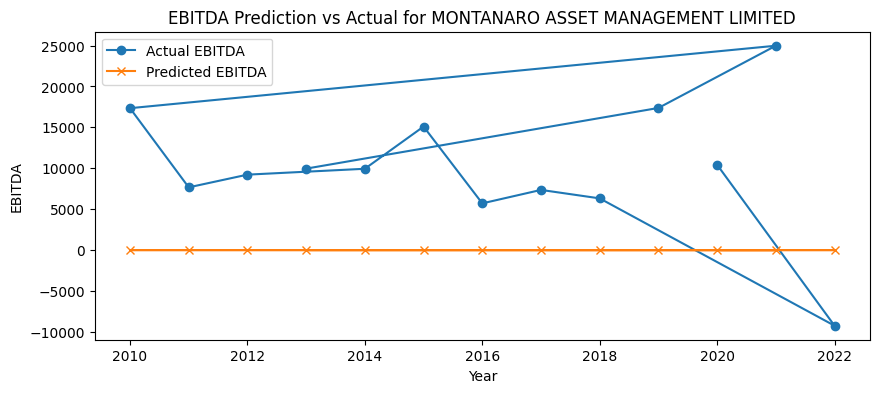

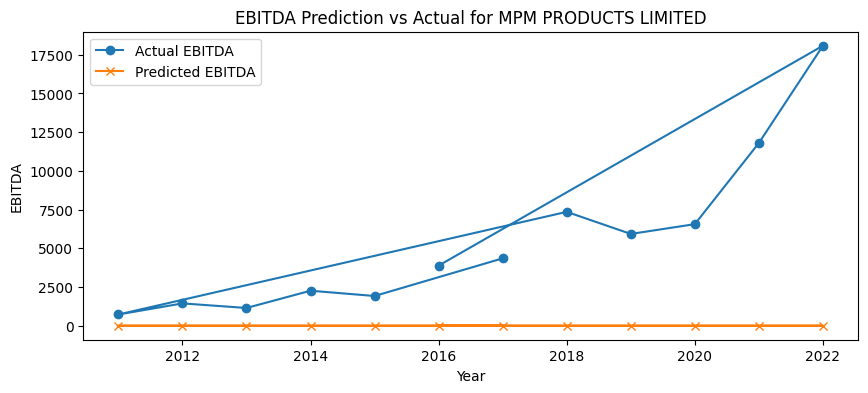

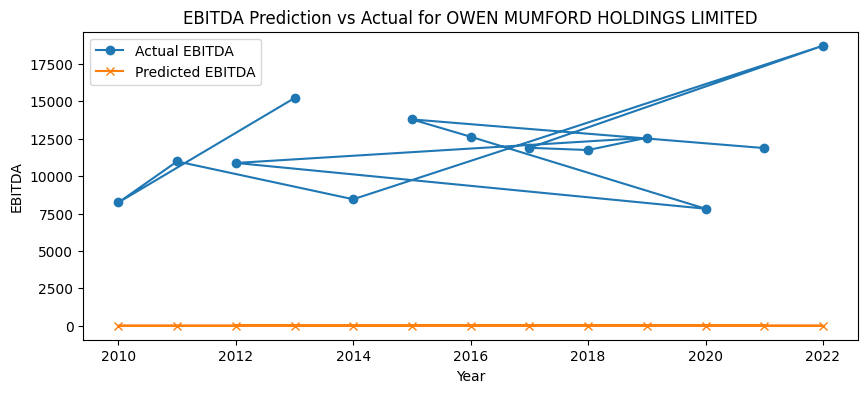

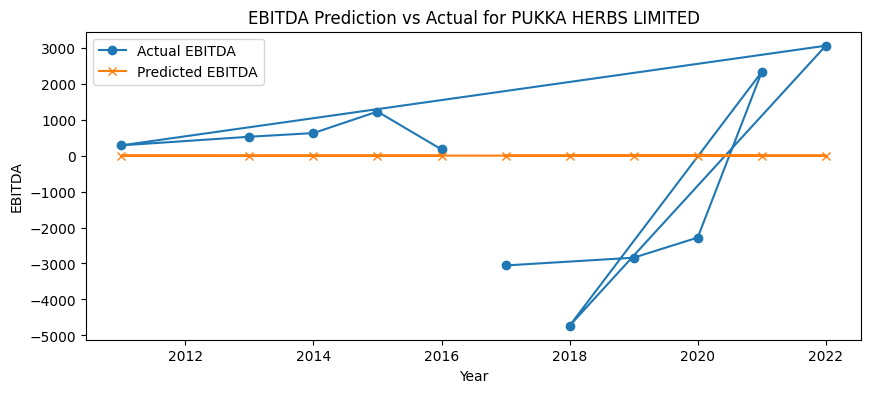

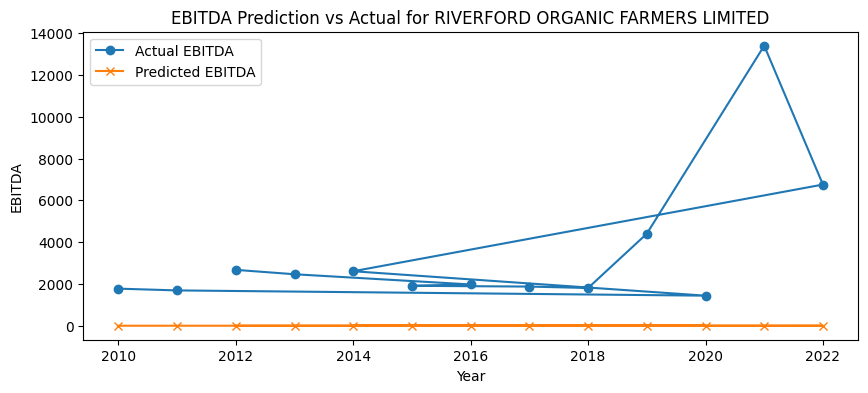

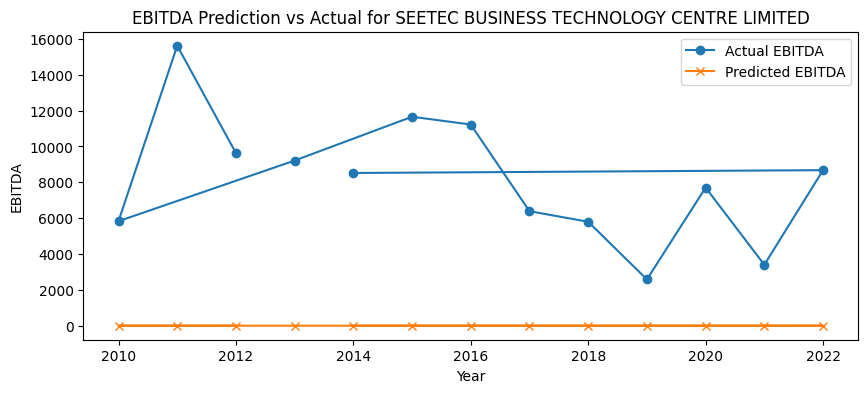

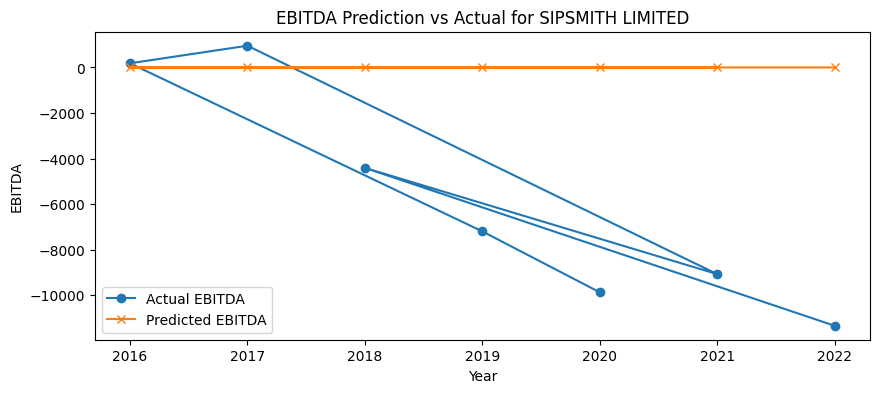

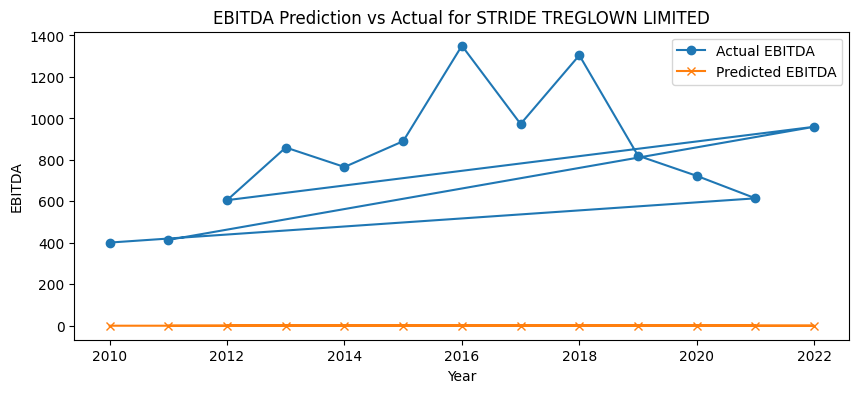

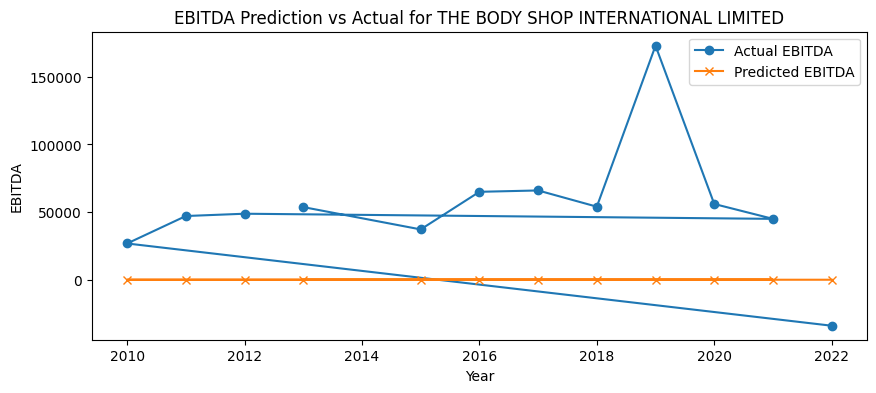

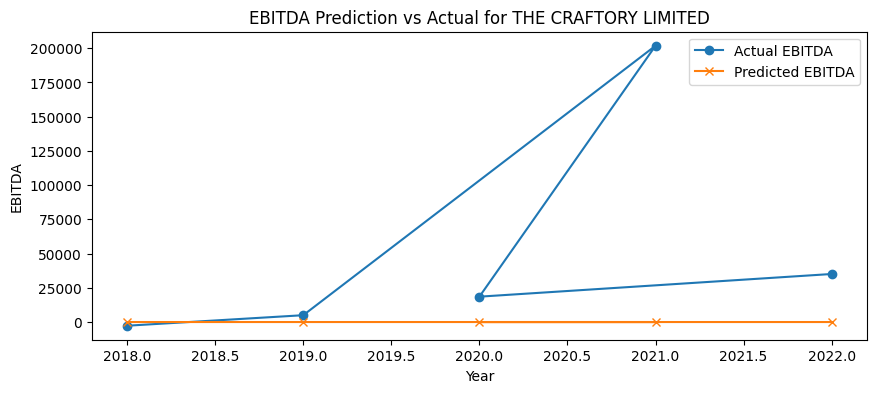

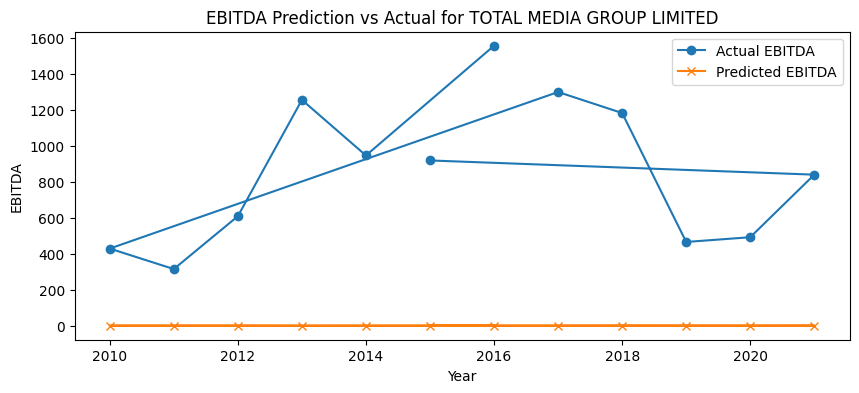

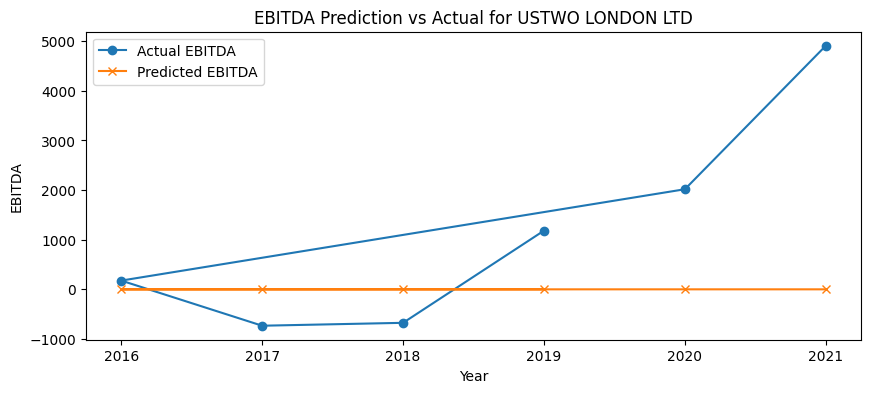

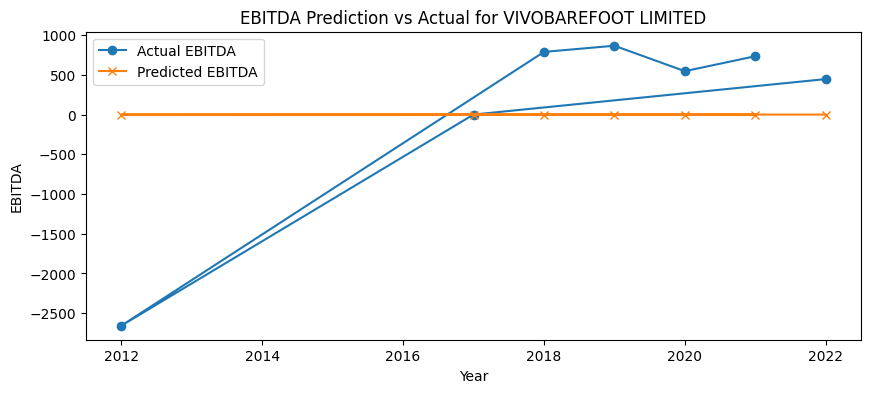

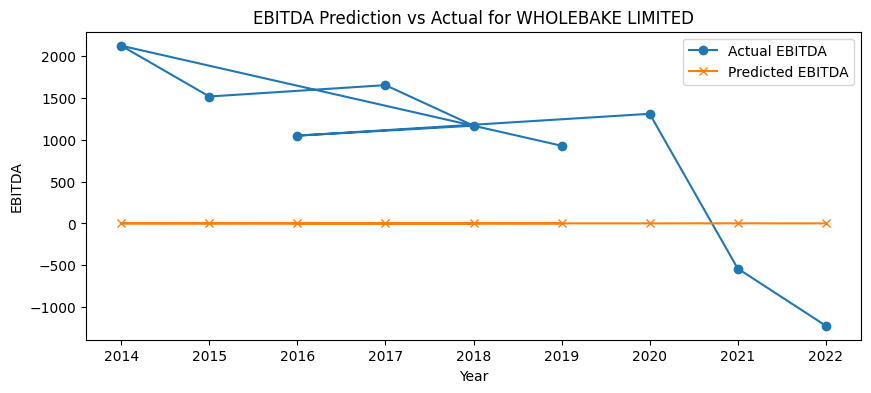

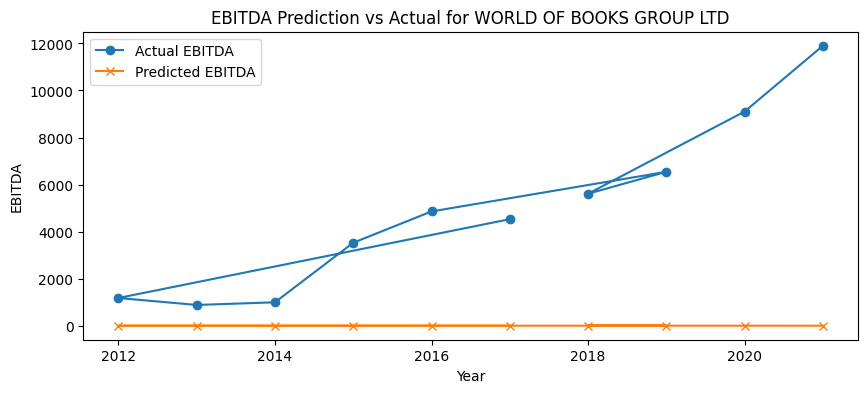

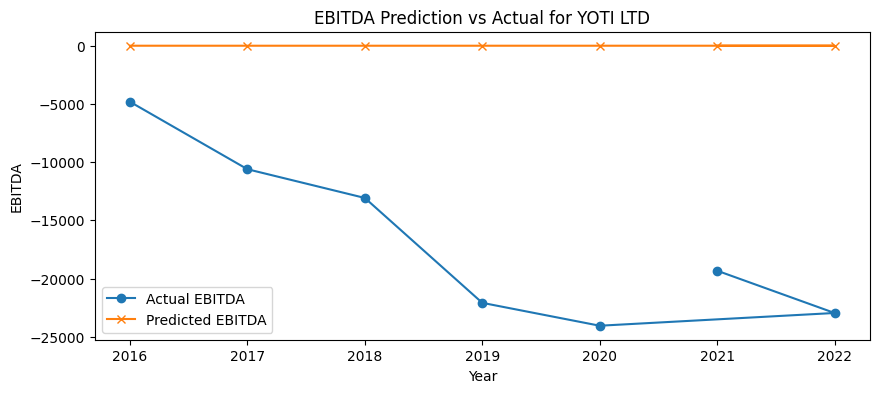

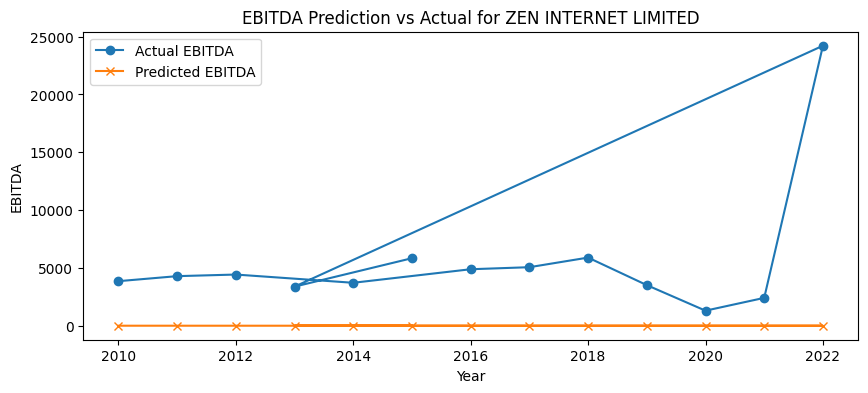

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


test_data.reset_index(inplace=True)

test_data['Predicted_EBITDA'] = predictions.flatten()

# Calculate the metrics
mse = mean_squared_error(test_data['EBITDA'], test_data['Predicted_EBITDA'])
rmse = mse ** 0.5

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

for company in test_data['Company name'].unique():
    plt.figure(figsize=(10, 4))
    plt.title(f'EBITDA Prediction vs Actual for {company}')

    company_data = test_data[test_data['Company name'] == company]
    plt.plot(company_data['Year'], company_data['EBITDA'], label='Actual EBITDA', marker='o')
    plt.plot(company_data['Year'], company_data['Predicted_EBITDA'], label='Predicted EBITDA', marker='x')

    plt.xlabel('Year')
    plt.ylabel('EBITDA')
    plt.legend()
    plt.show()
